In [9]:
import os
import copy
import json
import torch
import argparse
import numpy as np
from PIL import Image
from transformers import (
    Blip2Processor, Blip2ForConditionalGeneration,
    AutoProcessor, AutoModelForImageTextToText
)

In [10]:
torch.cuda.empty_cache()

device = torch.device("cuda")
model_name = "Salesforce/blip2-opt-2.7b"
processor = Blip2Processor.from_pretrained(model_name)
model = Blip2ForConditionalGeneration.from_pretrained(
    model_name,
    torch_dtype=torch.float16
)
model.to(device)
pass

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

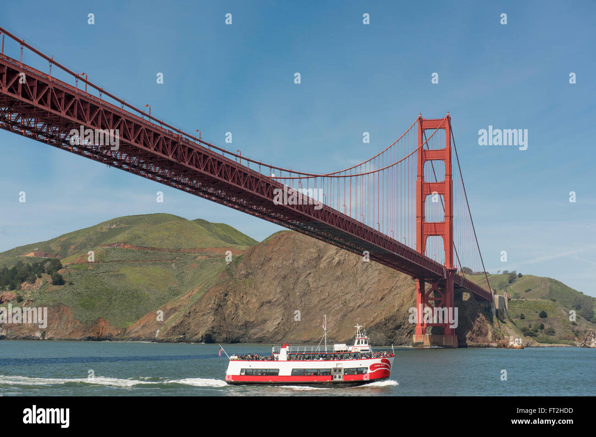

In [11]:
image_path = "assets/data/bongard-ow/images/0542/pos__0__2023-03-18-08-42-43__https:__c8.alamy.com__comp__FT2HDD__leisure-boat-passing-underneath-the-golden-gate-bridge-in-san-francisco-FT2HDD.jpg"
image = Image.open(image_path).convert("RGB")
display(image.resize((596, 437)))

In [15]:
# Generate caption
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=2000, max_length=50, min_length=5)

# with torch.no_grad():
#     generated_ids = model.generate(
#         **inputs,
#         do_sample=False,
#         num_beams=5,
#         max_length=50,
#         min_length=5
#     )

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(f"Caption: {generated_text}")

Both `max_new_tokens` (=2000) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Caption: a
